# [E-01] rock_scissor_paper

In [62]:
from PIL import Image
import os, glob
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# config
image_size = 224
home_path = os.getenv("HOME")

In [63]:
def resize_images(image_path):
    """ 이미지 리사이즈 """
    print(image_path, "resizing...")
    #  glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다
    images = glob.glob(image_path+"/*.jpg")

    count = 0
    target_size = (image_size, image_size)
    for img in images:
        old_image = Image.open(img)
        new_image = old_image.resize(target_size,Image.ANTIALIAS)
        new_image.save(img, "JPEG")
        count += 1

    print(count, "images resizied")

In [64]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=image_size
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    scissor = 0
    rock = 0
    paper = 0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        scissor=scissor+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1
        rock=rock+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        paper=paper+1

    print("불러온 이미지 개수는", idx,"개 입니다.")
    print("scissor", scissor,"개,","rock", rock,"개,","paper", paper,"개")
    return imgs, labels

## 이미지 사이즈 변환

In [65]:
path = home_path + "/aiffel/rock_scissor_paper/scissor"
resize_images(path)
path = home_path + "/aiffel/rock_scissor_paper/rock"
resize_images(path)
path = home_path + "/aiffel/rock_scissor_paper/paper"
resize_images(path)

/Users/gimjun-il/aiffel/rock_scissor_paper/scissor resizing...
100 images resizied
/Users/gimjun-il/aiffel/rock_scissor_paper/rock resizing...
100 images resizied
/Users/gimjun-il/aiffel/rock_scissor_paper/paper resizing...
100 images resizied


## 정규화

불러온 이미지 개수는 300 개 입니다.
scissor 100 개, rock 100 개, paper 100 개
x_train shape: (300, 224, 224, 3)
y_train shape: (300,)
라벨:  2


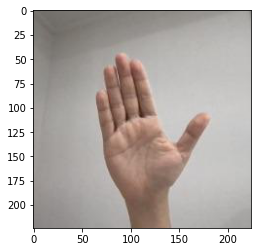

In [66]:
image_dir_path = home_path + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

plt.imshow(x_train[201])
print('라벨: ', y_train[201])

## 모델 작성

In [67]:
n_channel_1 = 32
n_channel_2 = 64
n_dense = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(image_size,image_size,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 16)      2320      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 46656)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               23888384  
_________________________________________________________________
dense_19 (Dense)             (None, 3)                

## 학습

In [68]:
n_train_epoch = 10

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
10/10 [==============================] - 7s 671ms/step - loss: 12.8140 - accuracy: 0.3300
Epoch 2/10
10/10 [==============================] - 4s 385ms/step - loss: 1

## 테스트 데이터 로드

/Users/gimjun-il/aiffel/rock_scissor_paper/test/scissor resizing...
299 images resizied
/Users/gimjun-il/aiffel/rock_scissor_paper/test/rock resizing...
301 images resizied
/Users/gimjun-il/aiffel/rock_scissor_paper/test/paper resizing...
300 images resizied
불러온 이미지 개수는 900 개 입니다.
scissor 299 개, rock 301 개, paper 300 개
x_train shape: (900, 224, 224, 3)
y_train shape: (900,)
라벨:  0


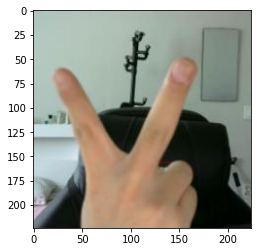

In [60]:
image_dir_path = home_path + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = home_path + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = home_path + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = home_path + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 900)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

plt.imshow(x_test[201])
print('라벨: ', y_test[201])

## 모델 검증

In [69]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print('test_loss: {}'.format(test_loss))
print('test_accuracy: {}'.format(test_accuracy))

29/29 - 4s - loss: 1.8510 - accuracy: 0.3889
test_loss: 1.85104501247406
test_accuracy: 0.3888888955116272
